## Case Study: Home Credit Default Risk

### Greetings to Société Générale!

### I wish to express my gratitude for granting me the opportunity to engage with the Home Credit Default Risk machine learning challenge, which proved to be an exceptional problem with a genuine dataset. The experience was invaluable, and I acquired substantial knowledge. Once again, thank you for facilitating this experience.

### Sincerely,
### Abhinish Boora 
### Dr. B. R. Ambedkar School of Economics University

### Problem Description: Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

### While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Evaluation Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

### Submission File For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

### I will focus exclusively on the primary file, 'application_train,' and the testing data, 'application_test.' This will create a baseline that can be enhanced by leveraging additional files.

### The reference for the model building approach is derived from the following source: 'https://www.kaggle.com/code/seifmechi/credit-default-risk.' 

### Setting the Working Directory:

In [1]:
import os

In [2]:
WorkingDirectory = os.getcwd()
print("Current Working Directory", WorkingDirectory)

Current Working Directory C:\Users\abhinish\Downloads\Home Credit Default Risk\Code


### A) Packages:

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy.random import randint
from multiprocessing import cpu_count
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install --upgrade imbalanced-learn
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)

1.3.1


In [5]:
!pip install xgboost
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

In [6]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline #pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE #for feature selection
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import (f1_score,classification_report,
                             roc_auc_score,confusion_matrix,roc_curve,auc) # evaluatin metrics
from sklearn.model_selection import KFold,RandomizedSearchCV ,cross_val_score,RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import gc

### B) Analysing the given data:

#### 1) Data being very big, it has been modified to reduce memory usage and speeding up the processes.

In [7]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)


    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [8]:
application_train = import_data("C:\\Users\\abhinish\\Downloads\\Home Credit Default Risk\\Data\\application_train.csv")
application_test = import_data("C:\\Users\\abhinish\\Downloads\\Home Credit Default Risk\\Data\\application_test.csv")

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


#### 2) Overview:

In [9]:
pd.set_option('display.max_rows', 30)
def info(table):
    print(f'\n the shape of the table is : \n',table.shape)
    print('-' * 80)
    print('\n data types : ', table.dtypes.value_counts().sort_values())
    print('-' * 80)
    missings=table.isna().mean()[table.isna().mean().sort_values(ascending=False)!=0].sort_values(ascending=False)
    print('-' * 80)
    print('\n number of features having missing data : ',len(missings))
    print('-' * 80)
    print('\n missing data in the table: \n',missings)
    print('-' * 80)
    print(missings[missings>0.5])
    print('-' * 80)
    print('\n missing data over 50% : ',len(missings[missings>0.5]))
info(application_train) 


 the shape of the table is : 
 (307511, 122)
--------------------------------------------------------------------------------

 data types :  int32       2
int16       2
float32     4
object     16
int8       37
float16    61
dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  67
--------------------------------------------------------------------------------

 missing data in the table: 
 COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
                              ...   
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_ANNUITY                 0.000039
CNT_FAM_MEMBERS             0.000007
DAYS_LAST_PHONE_CHANGE      0.000003
Length: 67, dtype: float64
-----

#### 3) Target Examining:

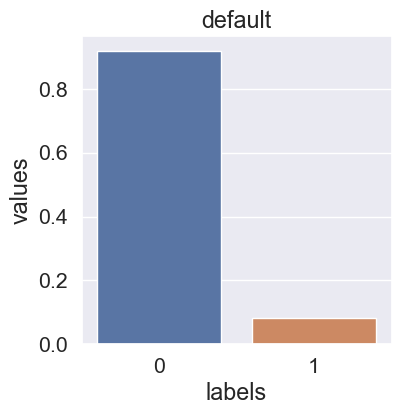

In [105]:
temp = application_train.TARGET.value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(application_train)})
plt.figure(figsize = (4,4))
plt.title('default')
sns.set_color_codes("colorblind")
sns.barplot(x = 'labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

#### 4) Numeric Features:

In [11]:
NUMERIC_FEATURES = application_train.select_dtypes(['int8','int16','float16','int32','float32','int64','float64']).columns

In [12]:
application_train[NUMERIC_FEATURES].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990259e+05,27108.572266,5.383961e+05,0.000000,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.000000,0.000000,0.000000,NaN,NaN,NaN
std,102790.175348,0.272419,0.722121,2.371759e+05,4.024795e+05,14493.233398,3.695427e+05,0.013824,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083984,0.110718,0.204712,0.0,NaN,0.0
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010010,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018845,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028656,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072510,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.0,261.0,25.0


#### 5) Visualisation and Interpretation:

In [13]:
def plot_distribution(df, FEATURES):
    i = 0
    t1 = df.loc[df['TARGET'] != 0]
    t0 = df.loc[df['TARGET'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(4, 2, figsize=(16, 20))

    for feature in FEATURES:
        if feature != 'TARGET':
            i += 1
            plt.subplot(4, 2, i)
            sns.kdeplot(t1[feature], bw=0.5, color='red', label="TARGET = 1")
            sns.kdeplot(t0[feature], bw=0.5, label="default = 0")
            plt.ylabel('Density plot', fontsize=12)
            plt.xlabel(feature, fontsize=12)
            plt.xticks(fontsize=12, rotation=90)  # Set the font size for x-axis labels
            plt.yticks(fontsize=12)  # Set the font size for y-axis labels

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

In [14]:
domain_features=['AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']

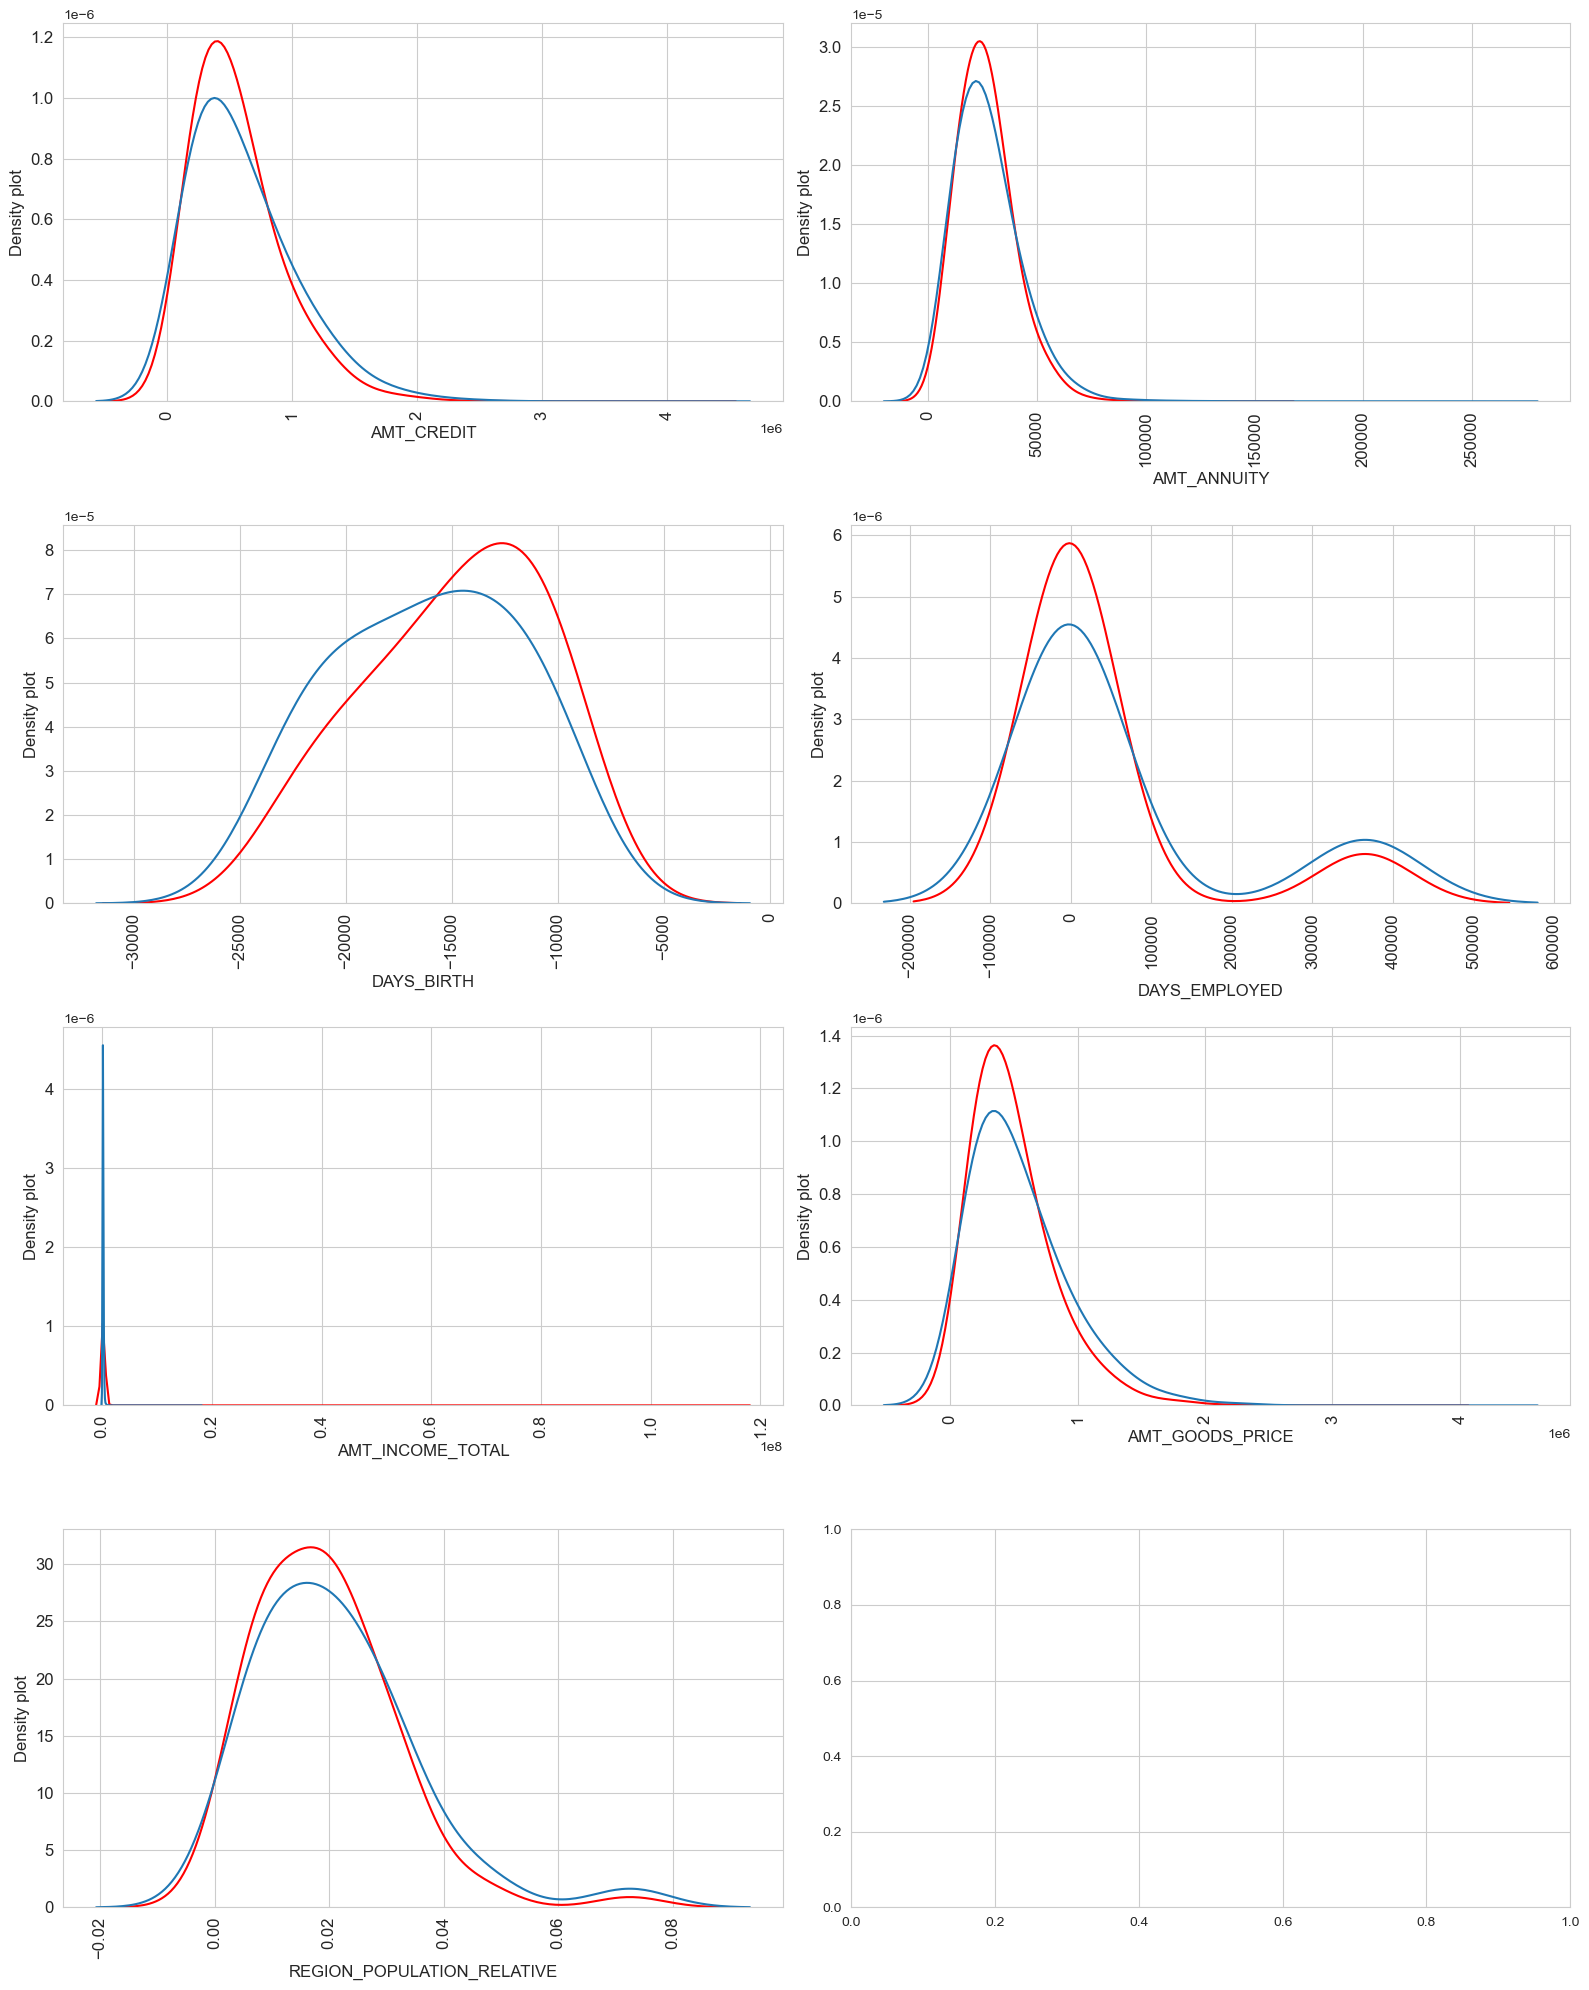

In [15]:
plot_distribution(application_train,domain_features)

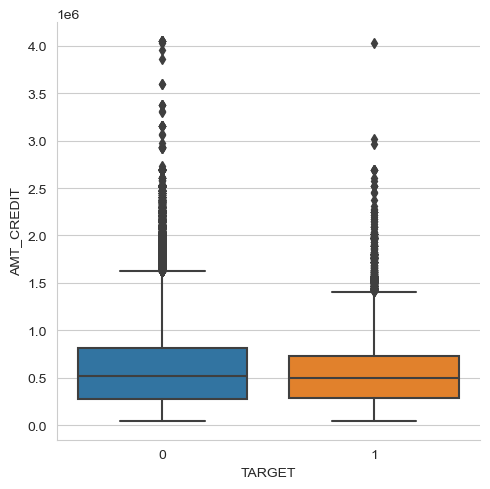

In [16]:
sns.catplot(application_train.drop(application_train.AMT_INCOME_TOTAL.argmax())
,x='TARGET',y='AMT_CREDIT',kind='box');

In [108]:
EXT_SOURCE_TARGET=['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']
application_train[EXT_SOURCE_TARGET].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.0,0.214,0.1868,-0.1553
EXT_SOURCE_2,0.214,1.0,0.1092,-0.1605
EXT_SOURCE_3,0.1868,0.1092,1.0,-0.1789
TARGET,-0.1553,-0.1605,-0.1789,1.0


In [18]:
def t_test(df):
    t_stat_list=[]
    p_val_list=[]
    variable=[]

    for var in df.columns:    
        t_stat, p_val = stats.ttest_ind(application_train[application_train['TARGET'] == 0][var],
                                        application_train[application_train['TARGET'] == 1][var])
        if p_val < 0.05:
            variable.append(var)
            t_stat_list.append(t_stat)
            p_val_list.append(p_val)

    t_test = pd.DataFrame({'variable': variable, 't_stat': t_stat_list, 'p_val': p_val_list})
    return t_test.sort_values(by='p_val',ascending=True)

In [19]:
t_test(application_train.select_dtypes(['int8','int16','float16','int32','float32','int64','float64']))

,variable,t_stat,p_val
0,TARGET,-inf,0.000000e+00
5,DAYS_BIRTH,-43.519836,0.000000e+00
12,REGION_RATING_CLIENT_W_CITY,-33.829889,2.078455e-250
11,REGION_RATING_CLIENT,-32.718363,2.172433e-234
7,DAYS_ID_PUBLISH,-28.572653,2.527524e-179
...,...,...,...
19,FLAG_DOCUMENT_2,-3.004040,2.664419e-03
23,FLAG_DOCUMENT_9,2.413585,1.579700e-02
24,FLAG_DOCUMENT_11,2.345343,1.901021e-02
2,AMT_INCOME_TOTAL,2.208106,2.723762e-02


#### 6) Categorical Features:

In [20]:
application_train.select_dtypes('O').nunique().sort_values()

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

In [21]:
def cat_stats(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        cat_perc_0 = df[df['TARGET'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['TARGET'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
        
        sns.set_color_codes("pastel")
        
        # Plot distribution for TARGET == 0
        sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        
        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
        
        
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()

In [22]:
important_features=['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE',
'ORGANIZATION_TYPE']

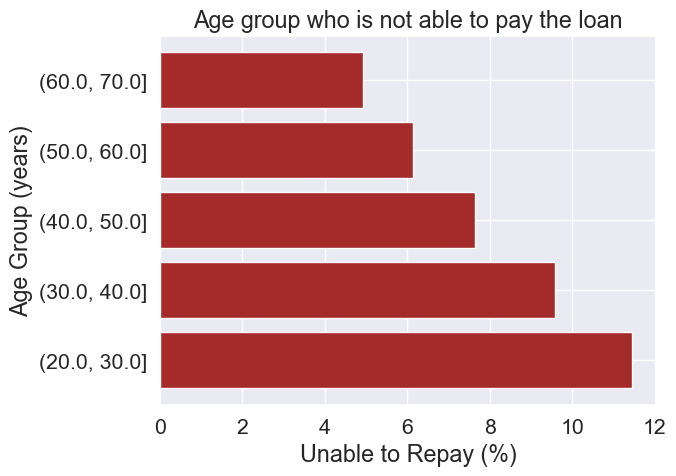


In this graph, it is evident that younger individuals are less likely to repay the loan. And as age increases, the proportion of people repaying the loan also increases.


In [97]:
#Lets check the age group who failed to repay the loan
data_age=application_train

data_age['Years_bin']=pd.cut((data_age['DAYS_BIRTH'] / 365)*-1, bins = np.linspace(20, 70, num = 6))
age_groups = data_age.groupby('Years_bin').mean()


age_groups  = data_age.groupby('Years_bin').mean()

# # Graph the age bins and the average of the target as a bar plot
plt.barh(age_groups.index.astype(str), 100 * age_groups['TARGET'], color='brown')

# # Plot labeling
plt.xlabel('Unable to Repay (%)')
plt.ylabel('Age Group (years)')
plt.title('Age group who is not able to pay the loan')
plt.show()

print("\nIn this graph, it is evident that younger individuals are less likely to repay the loan. And as age increases, the proportion of people repaying the loan also increases.")

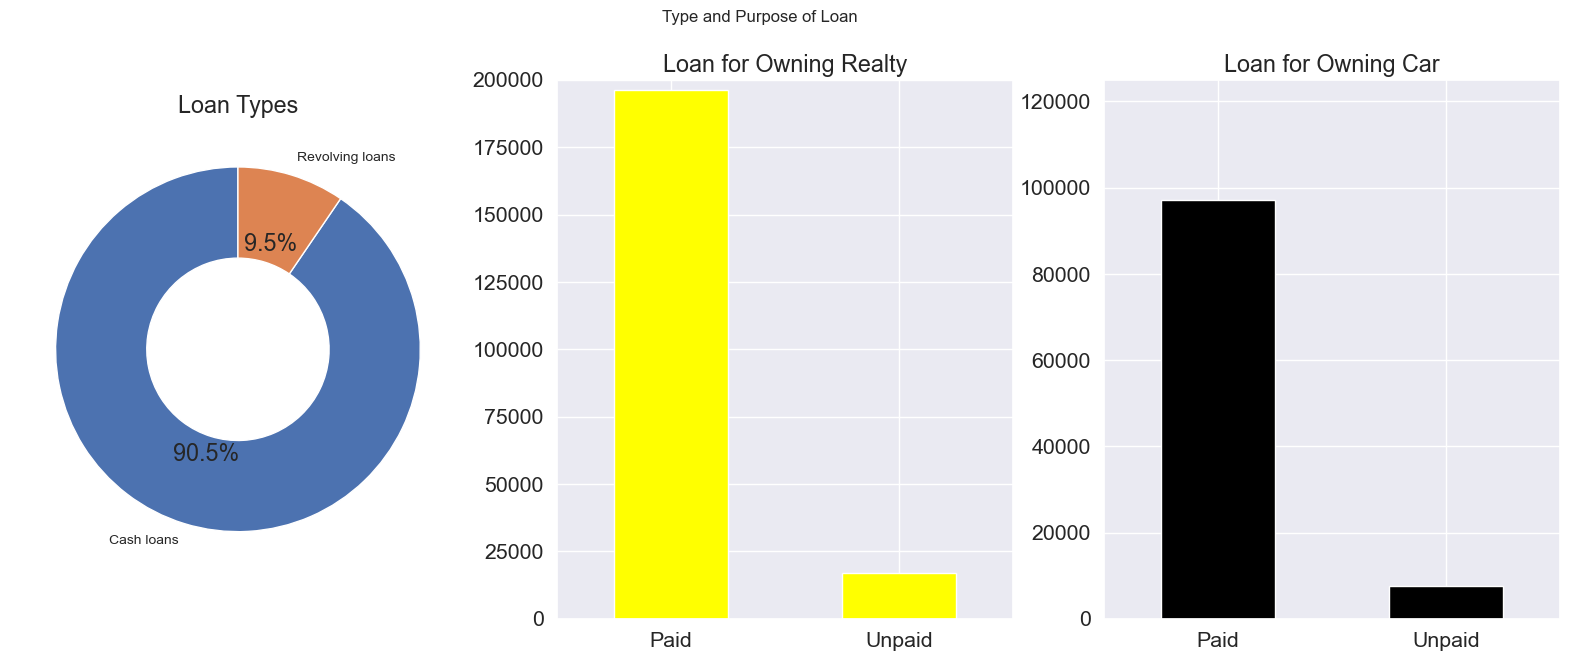

In [98]:
#Checking the type of loans and sub categories
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle("Type and Purpose of Loan", fontsize=12)

# Pie chart for loan types
loan_type = application_train['NAME_CONTRACT_TYPE'].value_counts()
wedges,texts, autotexts = axes[0].pie(
    loan_type, labels=loan_type.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
axes[0].set_title("Loan Types")

for t in texts:
    t.set(size=10)

# Bar plot for realty ownership
realty_ownership = application_train[application_train['FLAG_OWN_REALTY'] == 'Y']['TARGET'].value_counts()
realty_ownership.plot(kind='bar',color='yellow' , ax=axes[1])
axes[1].set_title("Loan for Owning Realty")
axes[1].set_xticklabels(['Paid', 'Unpaid'], rotation=0)
axes[1].set_ylim(0, 200000)

# Bar plot for car ownership
car_ownership = application_train[application_train['FLAG_OWN_CAR'] == 'Y']['TARGET'].value_counts()
car_ownership.plot(kind='bar',color='black', ax=axes[2])
axes[2].set_title("Loan for Owning Car")
axes[2].set_xticklabels(['Paid', 'Unpaid'], rotation=0)
axes[2].set_ylim(0, 125000)

plt.show() 

In [24]:
# Perform chi-squared test
def chi2_test(df):
    chi2_stat_list=[]; p_val_list=[]; dof_list=[]; ex_list=[]
    for var in df.columns:
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(application_train['TARGET'], application_train[var]))
        chi2_stat_list.append(chi2_stat); p_val_list.append(p_val); dof_list.append(dof); ex_list.append(ex);
    chi_squared=pd.DataFrame({'variable':df.columns,'dof':dof_list,'chi2_stat':chi2_stat_list,'p_val':p_val_list})
    chi_squared.set_index('variable',inplace=True)
    print(chi_squared.sort_values(by='p_val',ascending=True))

In [25]:
chi2_test(application_train.select_dtypes('O'))

                            dof    chi2_stat          p_val
variable                                                   
ORGANIZATION_TYPE            57  1609.240636  5.224541e-299
OCCUPATION_TYPE              17  1402.846796  3.784500e-288
NAME_INCOME_TYPE              7  1253.470808  1.928146e-266
NAME_EDUCATION_TYPE           4  1019.213187  2.447681e-219
CODE_GENDER                   2   920.791334  1.129022e-200
NAME_FAMILY_STATUS            5   504.694083  7.744842e-107
NAME_HOUSING_TYPE             5   420.556190   1.099089e-88
NAME_CONTRACT_TYPE            1   293.150542   1.023515e-65
FLAG_OWN_CAR                  1   146.656018   9.330994e-34
WALLSMATERIAL_MODE            6   139.235314   1.453180e-27
HOUSETYPE_MODE                2    27.632556   9.992328e-07
EMERGENCYSTATE_MODE           1    23.678150   1.138680e-06
NAME_TYPE_SUITE               6    32.825315   1.132931e-05
FLAG_OWN_REALTY               1    11.575827   6.681470e-04
FONDKAPREMONT_MODE            3    16.80


External source 1 and external source 3 are haing differences in TARGET values.


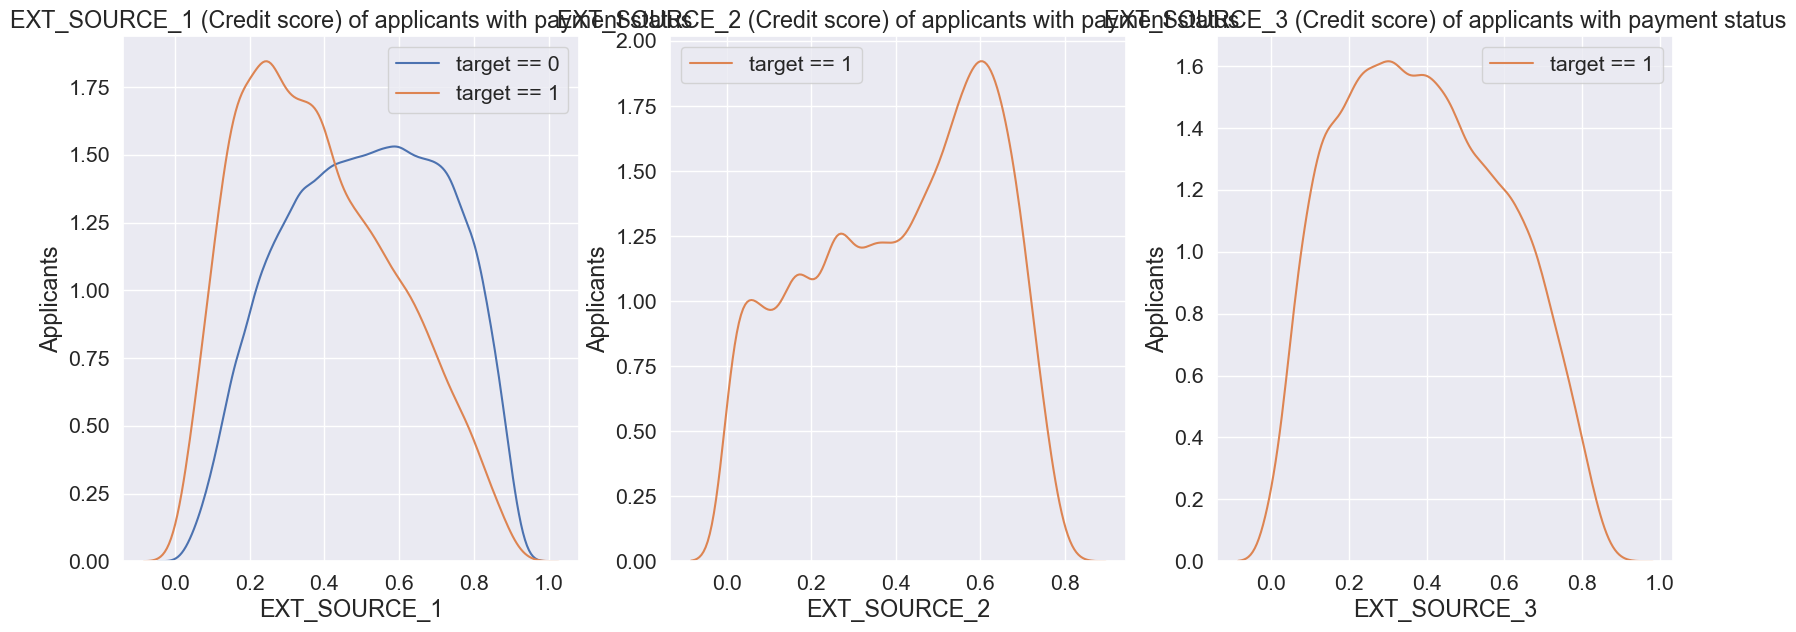

In [99]:
plt.figure(figsize = (20, 15))
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
      # create a new subplot for each source
    plt.subplot(2, 3, i + 1)
      # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET']==0, source], label = 'target == 0') 
     # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET']==1, source], label = 'target == 1')
    plt.title('%s (Credit score) of applicants with payment status' % source)
    plt.xlabel('%s' % source); plt.ylabel('Applicants');
    plt.legend()

print("\nExternal source 1 and external source 3 are haing differences in TARGET values.")

### C) Preprocessing + Feature Engineering:

In [26]:
application_train.drop('SK_ID_CURR',inplace=True,axis=1)
SK_ID_CURR=application_test['SK_ID_CURR']
application_test.drop('SK_ID_CURR',inplace=True,axis=1)
application_train['DAYS_EMPLOYED'].replace(365243,np.nan,inplace=True)
application_test['DAYS_EMPLOYED'].replace(365243,np.nan,inplace=True)
application_train['CODE_GENDER'].replace('XNA',np.nan,inplace=True)
application_test['CODE_GENDER'].replace('XNA',np.nan,inplace=True)

In [27]:
FLAG_DOCUMENT=['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']
application_train['FLAG_DOCUMENT']=application_train[FLAG_DOCUMENT].sum(axis=1)
application_test['FLAG_DOCUMENT']=application_test[FLAG_DOCUMENT].sum(axis=1)
application_train.drop(FLAG_DOCUMENT,axis=1,inplace=True)
application_test.drop(FLAG_DOCUMENT,axis=1,inplace=True)

In [28]:
AMT_REQ_CREDIT=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']
application_train.drop(AMT_REQ_CREDIT,axis=1,inplace=True)
application_test.drop(AMT_REQ_CREDIT,axis=1,inplace=True)

In [29]:
# Age Feature
application_train['AGE']=application_train['DAYS_BIRTH']/(-365)
application_test['AGE']=application_test['DAYS_BIRTH']/(-365)
# MEAN_EXT_SOURCE
application_train['MEAN_EXT_SOURCE'] = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
application_test['MEAN_EXT_SOURCE'] = application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
# Generate YEARS_EMPLOYED
application_train['YEARS_EMPLOYED']=application_train['DAYS_EMPLOYED']/(-365)
application_test['YEARS_EMPLOYED']=application_test['DAYS_EMPLOYED']/(-365)
# DAYS_BIRTH_SQUARED
application_train['DAYS_BIRTH_SQUARED'] = application_train['DAYS_BIRTH'] ** 2
application_test['DAYS_BIRTH_SQUARED'] = application_test['DAYS_BIRTH'] ** 2
# Generate DEBT_TO_INCOME_RATIO 
application_train['DEBT_TO_INCOME_RATIO'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_test['DEBT_TO_INCOME_RATIO'] = application_test['AMT_CREDIT'] / application_test['AMT_INCOME_TOTAL']
# Generate INCOME_TO_CREDIT 
application_train['INCOME_TO_CREDIT'] = application_train['AMT_INCOME_TOTAL'] / application_train['AMT_CREDIT']
application_test['INCOME_TO_CREDIT'] = application_test['AMT_INCOME_TOTAL'] / application_test['AMT_CREDIT']

In [30]:
new_numeric_features=['AGE','YEARS_EMPLOYED','DEBT_TO_INCOME_RATIO','INCOME_TO_CREDIT','DAYS_BIRTH_SQUARED']

In [31]:
t_test(application_train[new_numeric_features])

,variable,t_stat,p_val
0,AGE,43.519836,0.000000
1,DEBT_TO_INCOME_RATIO,4.284920,0.000018


In [32]:
application_train['_INCOME_CLASS']=pd.qcut(application_train['AMT_INCOME_TOTAL'],3,labels=['Low_INCOME', 'Medium_INCOME', 'High_INCOME'])
application_train['ANNUITY_CLASS']=pd.qcut(application_train['AMT_ANNUITY'],3,labels=['Low_ANNUITY', 'Medium_ANNUITY', 'High_ANNUITY'])
application_train['AMT_GOODS_PRICE_0.2_0.7']=np.where((application_train['AMT_GOODS_PRICE']<= 70000) & (application_train['AMT_GOODS_PRICE']>=20000) ,1,0)
application_train['DAYS_BIRTH_CLASS']=np.where(application_train['DAYS_BIRTH']<-15000,1,0)
application_train['CREDIT_UNDER_100K']=np.where(application_train['AMT_CREDIT']<100000,1,0)
application_train['YEARS_EMPLOYED_CLASS']=np.where(application_train['DAYS_EMPLOYED']<100000,1,0)

application_test['_INCOME_CLASS']=pd.qcut(application_test['AMT_INCOME_TOTAL'],3,labels=['Low_INCOME', 'Medium_INCOME', 'High_INCOME'])
application_test['ANNUITY_CLASS']=pd.qcut(application_test['AMT_ANNUITY'],3,labels=['Low_ANNUITY', 'Medium_ANNUITY', 'High_ANNUITY'])
application_test['AMT_GOODS_PRICE_0.2_0.7']=np.where((application_test['AMT_GOODS_PRICE']<= 7000) & (application_test['AMT_GOODS_PRICE']>=2000) ,1,0)
application_test['DAYS_BIRTH_CLASS']=np.where(application_test['DAYS_BIRTH']<-15000,1,0)
application_test['CREDIT_UNDER_100K']=np.where(application_test['AMT_CREDIT']<100000,1,0)
application_test['YEARS_EMPLOYED_CLASS']=np.where(application_test['DAYS_EMPLOYED']<100000,1,0)

In [33]:
new_categorical_features = ['_INCOME_CLASS','YEARS_EMPLOYED_CLASS','ANNUITY_CLASS',
                            'AMT_GOODS_PRICE_0.2_0.7','DAYS_BIRTH_CLASS','CREDIT_UNDER_100K']

In [34]:
chi2_test(application_train[new_categorical_features])

                         dof    chi2_stat          p_val
variable                                                
DAYS_BIRTH_CLASS           1  1344.950176  1.927723e-294
YEARS_EMPLOYED_CLASS       1   649.888509  2.362427e-143
ANNUITY_CLASS              2   157.760399   5.530502e-35
_INCOME_CLASS              2   152.501899   7.667140e-34
CREDIT_UNDER_100K          1    53.721017   2.310781e-13
AMT_GOODS_PRICE_0.2_0.7    1    34.102392   5.228696e-09


In [35]:
# Detect highly missing numeric features 
application_train_numeric= application_train.select_dtypes(include=['number'])
missings=application_train_numeric.loc[:,application_train_numeric.isna().mean() >= 0.6]
highly_missing_features = missings.columns
missings.columns

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI'],
      dtype='object')

In [36]:
#Remove highly missing features
application_train.drop(highly_missing_features,axis=1,inplace=True)
application_test.drop(highly_missing_features,axis=1,inplace=True)

In [37]:
target = application_train['TARGET']
features_train = application_train.drop('TARGET', axis=1)

# Impute numerical features using mean imputation
numeric_imputer = SimpleImputer(strategy='median')
numeric_features_train = features_train.select_dtypes(include='number')
imputed_numeric_features_train = numeric_imputer.fit_transform(numeric_features_train)
numeric_features_test = application_test.select_dtypes(include='number')
imputed_numeric_features_test = numeric_imputer.transform(numeric_features_test)

In [38]:
categorical_features_train = features_train.select_dtypes(include='object')
# using dummy_na=False ,we perform onehot encoding without affecting data distribution
dummy_categorical_features_train = pd.get_dummies(categorical_features_train,dummy_na=False)

# Concatenate imputed numerical and categorical features Train
imputed_features_train = pd.concat([pd.DataFrame(imputed_numeric_features_train, columns=numeric_features_train.columns),
                              dummy_categorical_features_train] ,axis=1)

# Impute categorical features Test using mode imputation and one-hot encoding

categorical_features_test = application_test.select_dtypes(include='object')
dummy_categorical_features_test = pd.get_dummies(categorical_features_test,dummy_na=False)

# Concatenate imputed numerical and categorical features
imputed_features_test = pd.concat([pd.DataFrame(imputed_numeric_features_test, columns=numeric_features_test.columns),
                              dummy_categorical_features_test],
                             axis=1)

### D) Model Building:

In [39]:
imputed_features_train.drop('NAME_INCOME_TYPE_Maternity leave',axis=1,inplace=True)
imputed_features_train.drop('NAME_FAMILY_STATUS_Unknown',axis=1,inplace=True)

In [40]:
X=imputed_features_train.copy()
y=target
#splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25, random_state=27)

In [41]:
# Define class weights
class_weights = {0: 1, 1: 9}

simple_estimators = {'Logistic Regression':LogisticRegression(),
                     'Decision Tree':DecisionTreeClassifier(),
                     'Linear Discriminant Analysys': LinearDiscriminantAnalysis()}

In [42]:
def training_simple_models(estimators):
    for name, model in estimators.items():
        print("Running " + name)

        # Apply SMOTE oversampling to the training data
        smote = SMOTE()
        X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)
        
        # Scaling data
        scaler = MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train_smt)
        X_test_scaled=scaler.transform(X_test)
        
        # Perform Recursive Feature Elimination (RFE)
        selector = RFE(estimator=model)
        X_train_selected = selector.fit_transform(X_train_scaled, y_train_smt)
        X_test_selected = selector.transform(X_test_scaled)
        
        # Train the model on the selected features
        model.fit(X_train_selected, y_train_smt)
        
        # Make predictions on the test data
        y_pred = model.predict_proba(X_test_selected)[:, 1]
        
        # Calculate and print the ROC AUC score
        roc_auc = roc_auc_score(y_test, y_pred)
        print("roc_auc:", roc_auc)
        print('*' * 20)

In [43]:
training_simple_models(simple_estimators)

Running Logistic Regression
roc_auc: 0.7331878913400464
********************
Running Decision Tree
roc_auc: 0.5384086171765827
********************
Running Linear Discriminant Analysys
roc_auc: 0.6810557144119367
********************


In [44]:
# Create an instance of the GradientBoostingClassifier class
clf = GradientBoostingClassifier(n_estimators=100, subsample=0.2, random_state=42, verbose = 1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict_proba(X_test)[:,1]
roc_GBC=roc_auc_score(y_test,y_pred)
print(roc_GBC)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5460           0.0105            1.15m
         2           0.5425           0.0085            1.13m
         3           0.5418           0.0072            1.09m
         4           0.5361           0.0048            1.07m
         5           0.5307           0.0035            1.05m
         6           0.5246           0.0023            1.04m
         7           0.5201           0.0021            1.03m
         8           0.5129           0.0007            1.02m
         9           0.5082           0.0011            1.00m
        10           0.5220           0.0055           59.47s
        20           0.5183           0.0039           53.27s
        30           0.4994          -0.0002           46.44s
        40           0.5038          -0.0012           39.66s
        50           0.5063           0.0029           32.81s
        60           0.4885          -0.0020           26.02s
       

In [45]:
# Running Xgboost
# Define class weights
class_weights = {0: 1, 1: 9}

# Create an instance of the XGBClassifier class
xgb = XGBClassifier(n_estimators=100, subsample=0.4, random_state=1, scale_pos_weight=class_weights[1]/class_weights[0])

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict_proba(X_test)[:,1]
roc_xgb=roc_auc_score(y_test,y_pred)
print(roc_xgb)

0.7275400526749293


In [46]:
# Running Random Forest 
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict_proba(X_test)[:,1]
print('Model auc score with 100 decision-trees : {0:0.4f}'. format(roc_auc_score(y_test, y_pred_100)))

Model auc score with 100 decision-trees : 0.7156


### E) Model Tuning:

In [47]:
from imblearn.pipeline import Pipeline



# Create the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('s', SMOTE(random_state=1)),
    ('r', RFE(estimator=LogisticRegression(random_state=1,max_iter=1000))),
    ('m', LogisticRegression(random_state=1))
])

# Define the parameter grid
param_grid = {
    'r__n_features_to_select': [40,50,70],  # RFE hyperparameter
    'r__step': [ 3,4,5],
    's__sampling_strategy': ['auto', 0.5, 1.0],  # SMOTE hyperparameter# RFE hyperparameter
    'm__penalty': ['l1', 'l2'],
    'm__C': [0.001,0.01, 0.1],
    'm__max_iter': [ 200, 300]
}

# Perform random search
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=1)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=cv,
    verbose=0,# Evaluation metric
    n_jobs=cpu_count(),
    random_state=1
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=4, random_state=1),
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('s', SMOTE(random_state=1)),
                                             ('r',
                                              RFE(estimator=LogisticRegression(max_iter=1000,
                                                                               random_state=1))),
                                             ('m',
                                              LogisticRegression(random_state=1))]),
                   n_jobs=24,
                   param_distributions={'m__C': [0.001, 0.01, 0.1],
                                        'm__max_iter': [200, 300],
                                        'm__penalty': ['l1', 'l2'],
                                        'r__n_features_to_select': [40, 50, 70],
                                        'r__step': [3, 4, 5],
                                        's__sampling_strategy': ['auto', 0.5,
                                                                 1.0]},
                   random_state=1, scoring='roc_auc')

In [48]:
best_LR = random_search.best_estimator_
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'s__sampling_strategy': 0.5, 'r__step': 4, 'r__n_features_to_select': 40, 'm__penalty': 'l2', 'm__max_iter': 200, 'm__C': 0.01}
Best Score: nan


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
best_gbc
print("Best parameter (CV score=%0.3f):" % gbc.best_score_)
print(gbc.best_params_)

Best parameter (CV score=0.748):
{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10, 'learning_rate': 0.01}


### F) Model Evaluation:

In [60]:
def roc_curve__confusion_matrix(model):
    from sklearn.metrics import roc_curve, auc
    y_prob_test = model.predict_proba(X_test)[:, 1]
    y_prob_train  = model.predict_proba(X_train)[:, 1]
    prediction=model.predict(X_test)
    # calculate tpr ,fpr
    fpr_test , tpr_test , thresholds = roc_curve(y_test, y_prob_test)
    fpr_train , tpr_train , thresholds1 = roc_curve(y_train, y_prob_train)

    # calculate AUC score
    roc_auc_test  = auc(fpr_test, tpr_test)
    roc_auc_train  = auc(fpr_train ,tpr_train)


    # calculate confusion matrix for test set
    confusion_matrix_test = confusion_matrix(y_test, prediction)

    # create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # plot ROC curves on the first subplot
    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)model');

    plt.tight_layout()
    plt.show()

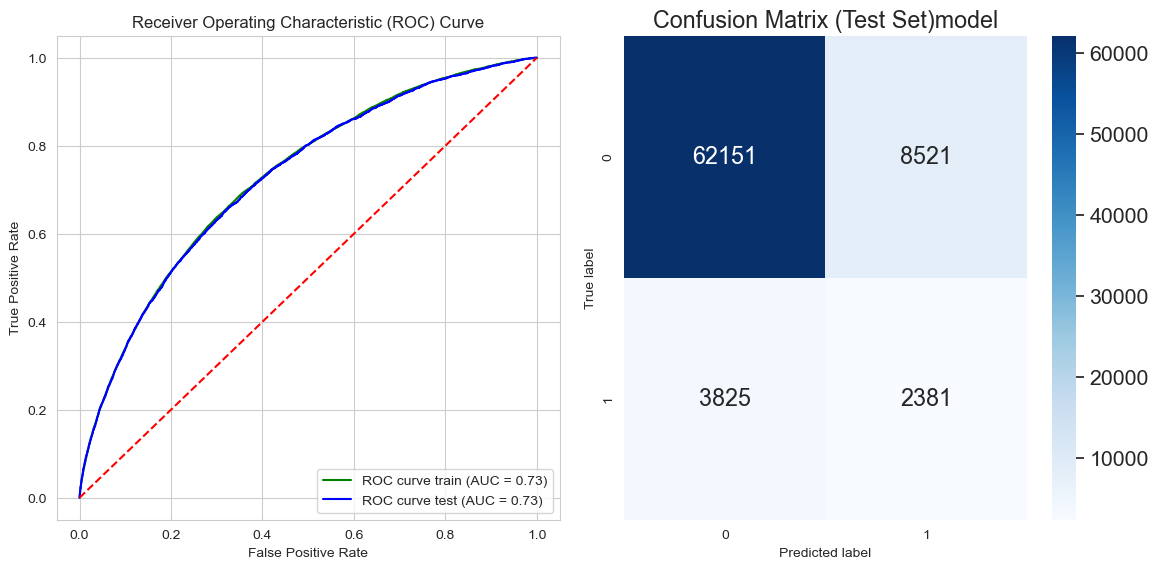

In [54]:
roc_curve__confusion_matrix(best_LR)

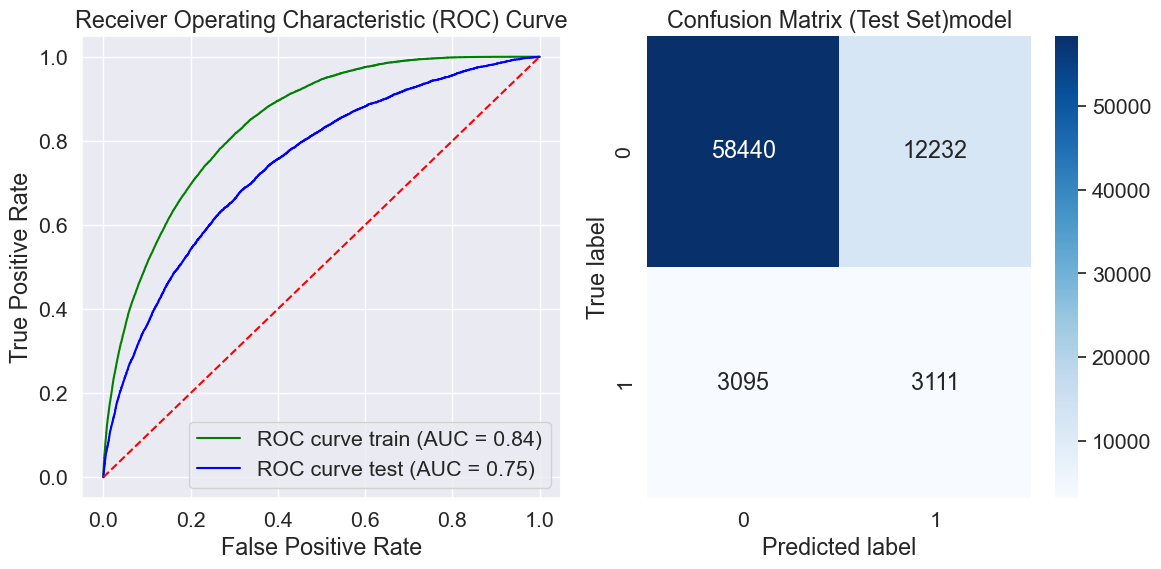

In [55]:
roc_curve__confusion_matrix(best_gbc)

### G) Submission:

In [95]:
application_test = pd.read_csv("C:\\Users\\abhinish\\Downloads\\Home Credit Default Risk\\Data\\application_test.csv", index_col=False)

# Now try to create the 'submit' DataFrame
submit = application_test[['SK_ID_CURR']]

In [96]:
# Make a submission for Logistic Regression
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = best_LR.predict_proba(imputed_features_test)[:,1]
submit.to_csv('submission_LR.csv', index = False)